In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import statsmodels.api as sm
from scipy.stats import shapiro

In [2]:
df= pd.read_csv('noisy_data.csv')
df.head(10)

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10 non-null     object 
 1   Age             9 non-null      float64
 2   Income          9 non-null      float64
 3   Online Shopper  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [4]:
df.isna().sum()

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

### Handling missing value by imputation

In [5]:
#Imputing missing values by mean in the Age columns
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)
df['Age'] = df['Age'].round(decimals = 0)

#Imputing missing values by mean in the Income columns
mean_income = df['Income'].mean()
df['Income'].fillna(mean_income, inplace=True)
df['Income'] = df['Income'].round(decimals = 2)

df

,Region,Age,Income,Online Shopper
0,India,49.0,86400.00,No
1,Brazil,32.0,57600.00,Yes
2,USA,35.0,64800.00,No
3,Brazil,43.0,73200.00,No
4,USA,45.0,76533.33,Yes
5,India,40.0,69600.00,Yes
6,Brazil,44.0,62400.00,No
7,India,53.0,94800.00,Yes
8,USA,55.0,99600.00,No
9,India,42.0,80400.00,Yes


In [6]:
#Converting the data type of age from float to integer
df['Age'] = df['Age'].astype(int)

#### Apply Normality tests to numerical columns and state the hypothesis clearly and comment on the normality of the data

In [7]:
#Only keeping the numerical columns 
newdf = df.drop(columns= ['Region', 'Online Shopper'])

In [8]:
H0 = 'The data is normally distributed'
H1 = 'The data is not normally distributed'

#Applying Shapiro-Wilk test on the Age column to check whether it is normally distributed or not.
alpha = 0.05
stats, pvalue = shapiro(newdf.Age)
print('statistics=%.3f\npvalue=%.3f\n' % (stats,pvalue))

if pvalue > alpha:
    print("We fail to reject the null hypothesis, therefore we can infer that", H0)
else:
    print("We reject the null hypothesis, therefore we can infer that", H1)

statistics=0.972
pvalue=0.908

We fail to reject the null hypothesis, therefore we can infer that The data is normally distributed


In [9]:
#Applying Shapiro-Wilk test on the Income column to check whether it is normally distributed or not.
alpha = 0.05
stats, pvalue = shapiro(newdf.Income)
print('statistics=%.3f\npvalue=%.3f\n' % (stats,pvalue))

if pvalue > alpha:
    print("We fail to reject the null hypothesis, therefore we can infer that", H0)
else:
    print("We reject the null hypothesis, therefore we can infer that", H1)

statistics=0.963
pvalue=0.815

We fail to reject the null hypothesis, therefore we can infer that The data is normally distributed


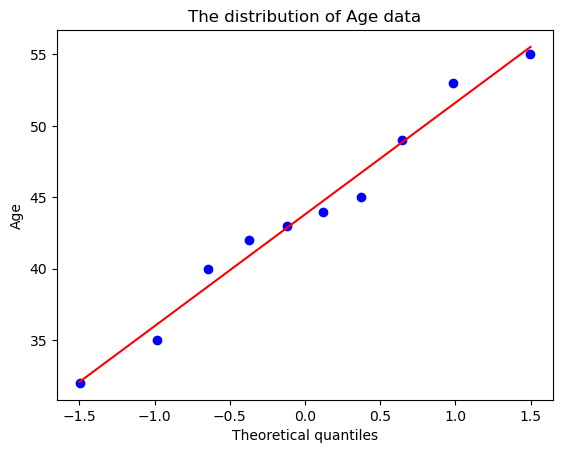

In [10]:
#Visualizing the distribution of the data using qqplot. 
import pylab
import scipy.stats as stats

stats.probplot(newdf.Age, dist="norm", plot=pylab)
pylab.title("The distribution of Age data")
pylab.ylabel("Age")
pylab.show()

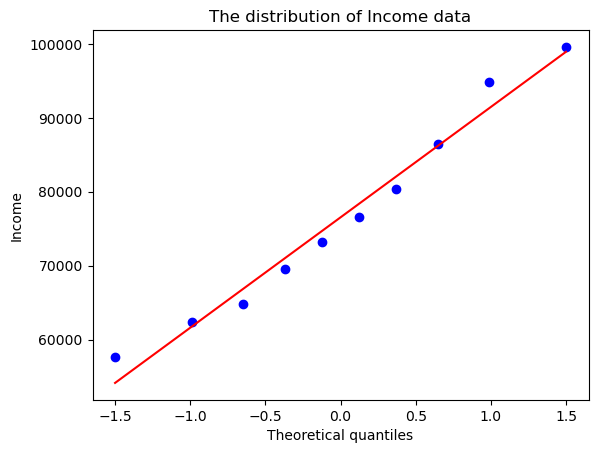

In [11]:
stats.probplot(newdf.Income, dist="norm", plot=pylab)
pylab.title("The distribution of Income data")
pylab.ylabel("Income")
pylab.show()

We could have used the Distplot from Seaborn library to visualize the data distribution, but the dataset is too small, hence used qqplot.

### Apply encodings for categorical variable and scale the features

In [12]:
# importing an array of features
x = df.iloc[:, :-1].values 

# importing an array of dependent variable
y = df.iloc[:, -1].values

In [13]:
#Encoding the features

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ColTrans = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder= 'passthrough')
x = np.array(ColTrans.fit_transform(x))

In [14]:
#Encoding the label

from sklearn.preprocessing import LabelEncoder
LblEnc = LabelEncoder()
y = LblEnc.fit_transform(y)

In [15]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
features = sc.transform(x)
features

array([[-6.54653671e-01,  1.22474487e+00, -6.54653671e-01,
         7.55609652e-01,  7.49473280e-01],
       [ 1.52752523e+00, -8.16496581e-01, -6.54653671e-01,
        -1.71465267e+00, -1.43817838e+00],
       [-6.54653671e-01, -8.16496581e-01,  1.52752523e+00,
        -1.27872403e+00, -8.91265467e-01],
       [ 1.52752523e+00, -8.16496581e-01, -6.54653671e-01,
        -1.16247639e-01, -2.53200398e-01],
       [-6.54653671e-01, -8.16496581e-01,  1.52752523e+00,
         1.74371458e-01, -2.27880382e-07],
       [-6.54653671e-01,  1.22474487e+00, -6.54653671e-01,
        -5.52176284e-01, -5.26656856e-01],
       [ 1.52752523e+00, -8.16496581e-01, -6.54653671e-01,
         2.90619097e-02, -1.07356977e+00],
       [-6.54653671e-01,  1.22474487e+00, -6.54653671e-01,
         1.33684785e+00,  1.38753835e+00],
       [-6.54653671e-01, -8.16496581e-01,  1.52752523e+00,
         1.62746694e+00,  1.75214696e+00],
       [-6.54653671e-01,  1.22474487e+00, -6.54653671e-01,
        -2.61557187e-01

### Text Analysis

In [16]:
from nltk.tokenize import RegexpTokenizer,word_tokenize
import nltk
from nltk.corpus import stopwords
import re 

In [17]:
f = open('wiki.txt','r')
text = str(f.read())
print(text)

The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled Computing Machinery and Intelligence which proposed what is now called the Turing test as a criterion of intelligence.

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.

Some notably successful NLP systems developed in the 1960s were SHRDLU, a natural-language system working in restricted blocks worlds wit

In [18]:
# Removing punctuations in string
# Using regex

import re
 
text1 = re.sub(r'[^\w\s]', '', text)
 
# printing result
print(text1)

The history of NLP generally started in the 1950s although work can be found from earlier periods In 1950 Alan Turing published an article titled Computing Machinery and Intelligence which proposed what is now called the Turing test as a criterion of intelligence

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English The authors claimed that within three or five years machine translation would be a solved problem2 However real progress was much slower and after the ALPAC report in 1966 which found that tenyearlong research had failed to fulfill the expectations funding for machine translation was dramatically reduced Little further research in machine translation was conducted until the late 1980s when the first statistical machine translation systems were developed

Some notably successful NLP systems developed in the 1960s were SHRDLU a naturallanguage system working in restricted blocks worlds with restricted vocabul

In [19]:
text = text1.lower()
print(text)

the history of nlp generally started in the 1950s although work can be found from earlier periods in 1950 alan turing published an article titled computing machinery and intelligence which proposed what is now called the turing test as a criterion of intelligence

the georgetown experiment in 1954 involved fully automatic translation of more than sixty russian sentences into english the authors claimed that within three or five years machine translation would be a solved problem2 however real progress was much slower and after the alpac report in 1966 which found that tenyearlong research had failed to fulfill the expectations funding for machine translation was dramatically reduced little further research in machine translation was conducted until the late 1980s when the first statistical machine translation systems were developed

some notably successful nlp systems developed in the 1960s were shrdlu a naturallanguage system working in restricted blocks worlds with restricted vocabul

In [20]:
years = re.findall(r"\b(18[0-9]{2}|19[0-8][0-9]|199[0-9]|2[01][0-9]{2}|2200)|[\d]+[.,\d]+|[\d]*[.][\d]+\b",text)
years

['1950', '1950', '1954', '1966', '1980', '1960', '1964', '1966']

In [21]:
#convert text into tokens with RegexpTokenizer()
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
NewTextRegex = [w for w in tokens if not w in stopwords.words('english')]

print(NewTextRegex)

['history', 'nlp', 'generally', 'started', '1950s', 'although', 'work', 'found', 'earlier', 'periods', '1950', 'alan', 'turing', 'published', 'article', 'titled', 'computing', 'machinery', 'intelligence', 'proposed', 'called', 'turing', 'test', 'criterion', 'intelligence', 'georgetown', 'experiment', '1954', 'involved', 'fully', 'automatic', 'translation', 'sixty', 'russian', 'sentences', 'english', 'authors', 'claimed', 'within', 'three', 'five', 'years', 'machine', 'translation', 'would', 'solved', 'problem2', 'however', 'real', 'progress', 'much', 'slower', 'alpac', 'report', '1966', 'found', 'tenyearlong', 'research', 'failed', 'fulfill', 'expectations', 'funding', 'machine', 'translation', 'dramatically', 'reduced', 'little', 'research', 'machine', 'translation', 'conducted', 'late', '1980s', 'first', 'statistical', 'machine', 'translation', 'systems', 'developed', 'notably', 'successful', 'nlp', 'systems', 'developed', '1960s', 'shrdlu', 'naturallanguage', 'system', 'working', 'r

In [22]:
#convert text into tokens with word_tokenize()
nltk.download('punkt')
tokenizer2 = nltk.word_tokenize(text)
NewTextWord = []
for w in tokens:
    if w.isalnum() and w not in stopwords.words('english'):
        NewTextWord.append(w)
print(NewTextWord)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin1\AppData\Roaming\nltk_data...


['history', 'nlp', 'generally', 'started', '1950s', 'although', 'work', 'found', 'earlier', 'periods', '1950', 'alan', 'turing', 'published', 'article', 'titled', 'computing', 'machinery', 'intelligence', 'proposed', 'called', 'turing', 'test', 'criterion', 'intelligence', 'georgetown', 'experiment', '1954', 'involved', 'fully', 'automatic', 'translation', 'sixty', 'russian', 'sentences', 'english', 'authors', 'claimed', 'within', 'three', 'five', 'years', 'machine', 'translation', 'would', 'solved', 'problem2', 'however', 'real', 'progress', 'much', 'slower', 'alpac', 'report', '1966', 'found', 'tenyearlong', 'research', 'failed', 'fulfill', 'expectations', 'funding', 'machine', 'translation', 'dramatically', 'reduced', 'little', 'research', 'machine', 'translation', 'conducted', 'late', '1980s', 'first', 'statistical', 'machine', 'translation', 'systems', 'developed', 'notably', 'successful', 'nlp', 'systems', 'developed', '1960s', 'shrdlu', 'naturallanguage', 'system', 'working', 'r

[nltk_data]   Package punkt is already up-to-date!


The differnce between Regexptokenizer() and word_tokenize() is stated below:

The Regexptokenizer uses regular expression to split the string of characters into tokens, whereas word_tokenize() uses white spaces or punctuations to split the string of characters into tokens. word_tokenize() actually returns the syllables from a single word. Installing the Punkt sentence tokenization models is required for this particular tokenizer.

### Melbourne Housing Snapshot

In [23]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [24]:
melb = pd.read_csv("melb_data.csv")
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [25]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [26]:
melb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [27]:
#We will be predicting the price from other features, so dropping unnecessary columns.

melb.drop(['Suburb','Address','Date','Method', 'SellerG', 'CouncilArea','Lattitude','Longtitude', 'Propertycount'], axis = 1, inplace = True)
melb.head()

,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname
0,2,h,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan
1,2,h,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan
2,3,h,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan
3,3,h,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan
4,4,h,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan


In [28]:
#Checking null values
melb.isna().sum()

Rooms              0
Type               0
Price              0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6450
YearBuilt       5375
Regionname         0
dtype: int64

In [29]:
melb['Car'].value_counts()

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

In [30]:
#Filling missing carslots with mean. 

melb['Car'].fillna(np.floor(melb['Car'].mean()), inplace=True)

In [31]:
melb['BuildingArea'].value_counts()

120.00    114
110.00     89
100.00     88
130.00     84
115.00     77
         ... 
255.79      1
424.00      1
186.36      1
147.20      1
368.00      1
Name: BuildingArea, Length: 602, dtype: int64

In [32]:
#Filling Building Year with its mean

melb['BuildingArea'].fillna(int(melb['BuildingArea'].mean()), inplace = True)

In [33]:
melb['YearBuilt'].value_counts()

1970.0    866
1960.0    725
1950.0    580
1900.0    341
1980.0    338
         ... 
1897.0      1
1933.0      1
1830.0      1
1901.0      1
1857.0      1
Name: YearBuilt, Length: 144, dtype: int64

In [34]:
#Replacing null values of year built with mode.
melb['YearBuilt'].fillna(int(melb['YearBuilt'].mode()), inplace = True)


In [35]:
melb.isna().sum()

Rooms           0
Type            0
Price           0
Distance        0
Postcode        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
Regionname      0
dtype: int64

In [36]:
#Encoding Regionname and Type

ordinal_enc = OrdinalEncoder()
melb['Regionname'] = ordinal_enc.fit_transform(melb[['Regionname']])

melb['Type'] = ordinal_enc.fit_transform(melb[['Type']])

In [37]:
melb.dtypes

Rooms             int64
Type            float64
Price           float64
Distance        float64
Postcode        float64
Bedroom2        float64
Bathroom        float64
Car             float64
Landsize        float64
BuildingArea    float64
YearBuilt       float64
Regionname      float64
dtype: object

In [38]:
#Changing the datatypes where needed.

melb = melb.astype({"Price":"int", "Type": "int", "Postcode":"int","Bathroom":"int","Car":"int","YearBuilt":"int","Bedroom2":"int", "Regionname":"int"})
melb.dtypes

Rooms             int64
Type              int32
Price             int32
Distance        float64
Postcode          int32
Bedroom2          int32
Bathroom          int32
Car               int32
Landsize        float64
BuildingArea    float64
YearBuilt         int32
Regionname        int32
dtype: object

### Correlation

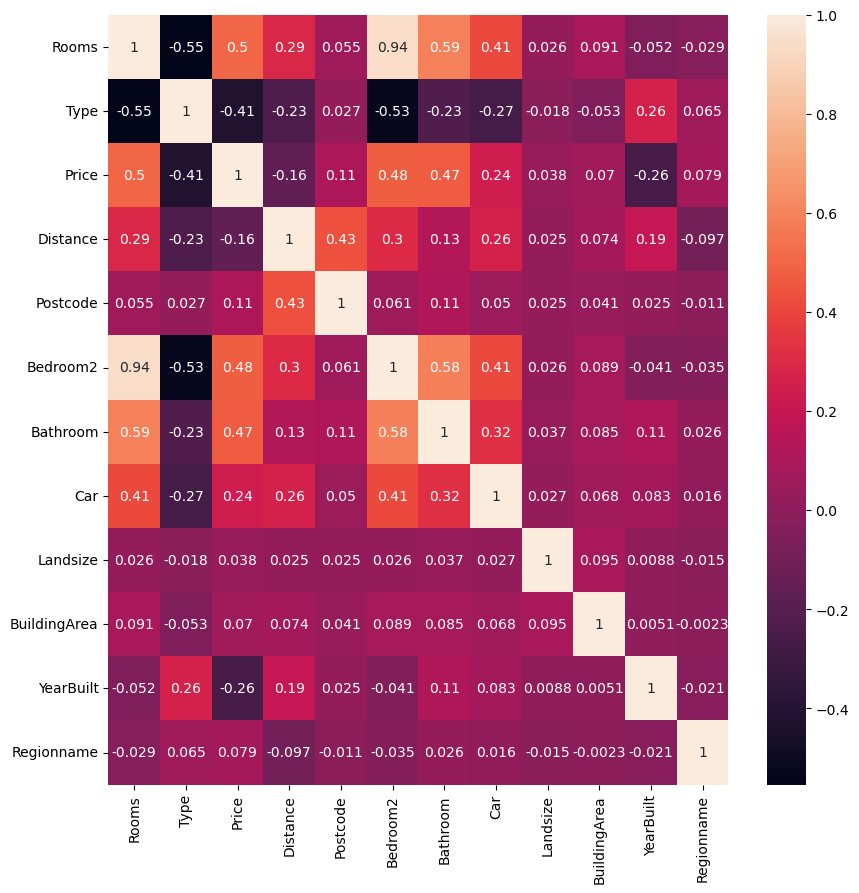

Correlation of different features of our dataset with price:
Rooms : 0.4966
Type : -0.4146
Distance : -0.1625
Postcode : 0.1079
Bedroom2 : 0.4760
Bathroom : 0.4670
Car : 0.2375
Landsize : 0.0375
BuildingArea : 0.0696
YearBuilt : -0.2594
Regionname : 0.0791


In [39]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(melb.corr(method= 'pearson'), color = "k", annot=True)
plt.show()

print('Correlation of different features of our dataset with price:')
for i in melb.columns:
    if i=='Price':
        continue
    corr, _ = pearsonr(melb[i], melb['Price'])
    print('%s : %.4f' %(i,corr))

In [40]:
#Splitting the dataset into features and labels

x = melb.drop(labels=['Price'], axis=1)
y = melb['Price']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

### Performing Chi-square test

In [42]:
chi = SelectKBest(score_func=chi2, k='all')
chi.fit(x_train, y_train)
x_train_chi = chi.transform(x_train)
x_test_chi = chi.transform(x_test)

Feature-0: 1539.955919
Feature-1: 6358.173022
Feature-2: 7868.573084
Feature-3: 6371.938077
Feature-4: 1487.855790
Feature-5: 1288.528216
Feature-6: 1506.633231
Feature-7: 41303725.666380
Feature-8: 1595949.493231
Feature-9: 1206.648836
Feature-10: 2327.065462


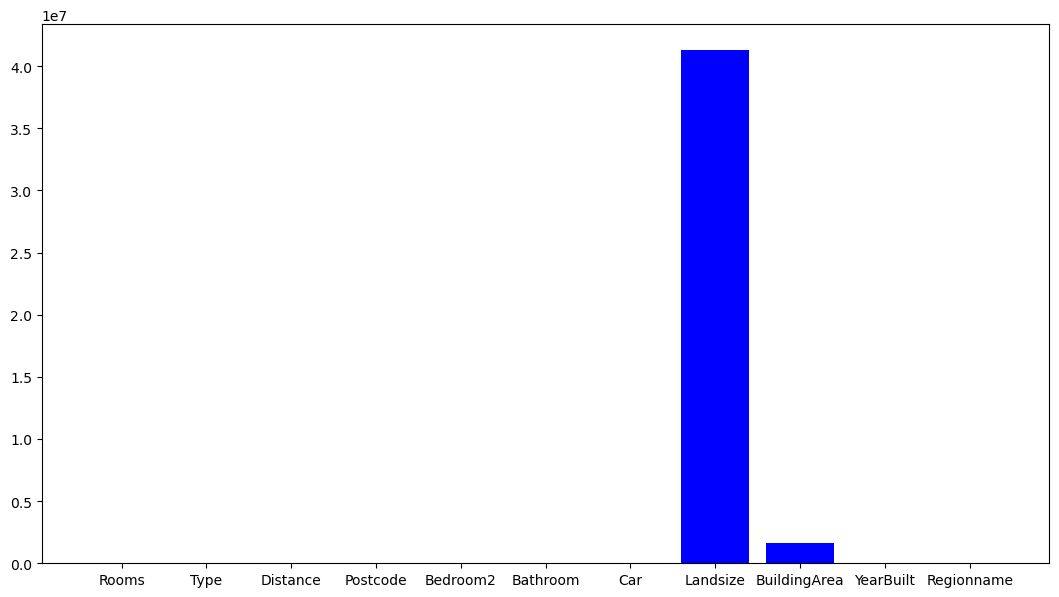

In [43]:
for i in range(len(chi.scores_)):
    print('Feature-%d: %f' % (i , chi.scores_[i]))
plt.figure(figsize=(13,7))
plt.bar(x.columns, chi.scores_, color = "Blue")
plt.show()

### Mutual Information

In [44]:
mutual_info_classif(x_train, y_train, discrete_features = 'auto')

array([0.46431498, 0.35662661, 0.09010379, 0.15238093, 0.50760096,
       0.91978053, 0.64144511, 0.12524566, 0.37230819, 0.28683322,
       0.31833556])

In [45]:
mi = SelectKBest(score_func = mutual_info_classif, k = "all")
mi.fit(x_train, y_train)
x_train_mi = mi.transform(x_train)
x_test_mi = mi.transform(x_test)

Feature-0: 0.498694
Feature-1: 0.353775
Feature-2: 0.089771
Feature-3: 0.143827
Feature-4: 0.512623
Feature-5: 0.923440
Feature-6: 0.596130
Feature-7: 0.125199
Feature-8: 0.386043
Feature-9: 0.279433
Feature-10: 0.339028


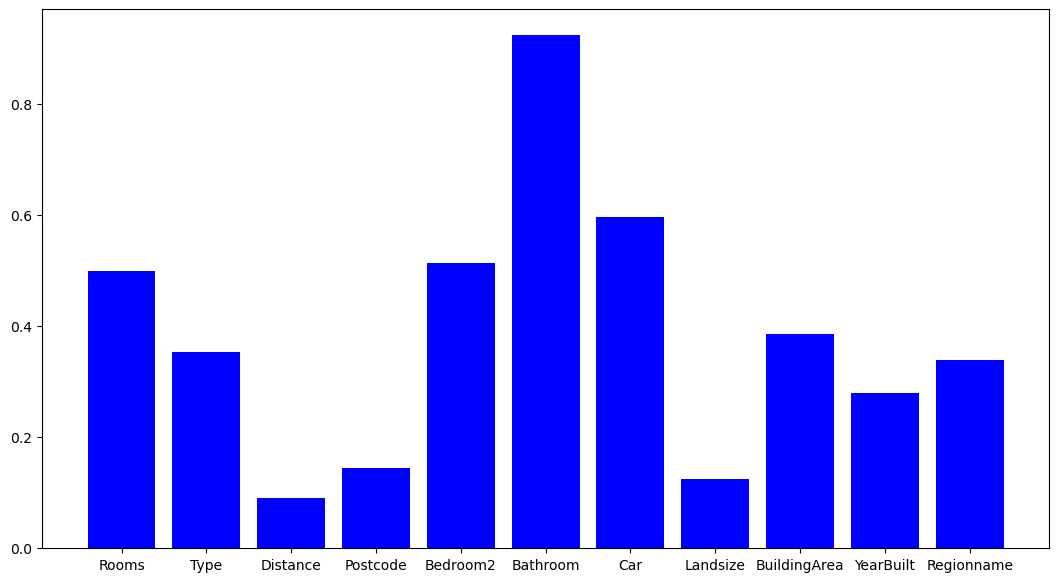

In [46]:
for i in range(len(mi.scores_)):
    print('Feature-%d: %f' % (i , mi.scores_[i]))
plt.figure(figsize=(13,7))
plt.bar(x.columns, mi.scores_, color = "blue")
plt.show()
    

### Random Forest

In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 250, max_features = 'sqrt', max_depth = 50, random_state=0)
rf.fit(x_train,y_train) # replace by x_train , y_train if we split

y_pred= rf.predict(x_test)

Feature: Rooms Score: 0.083
Feature: Type Score: 0.08
Feature: Distance Score: 0.178
Feature: Postcode Score: 0.155
Feature: Bedroom2 Score: 0.072
Feature: Bathroom Score: 0.076
Feature: Car Score: 0.027
Feature: Landsize Score: 0.117
Feature: BuildingArea Score: 0.089
Feature: YearBuilt Score: 0.068
Feature: Regionname Score: 0.056


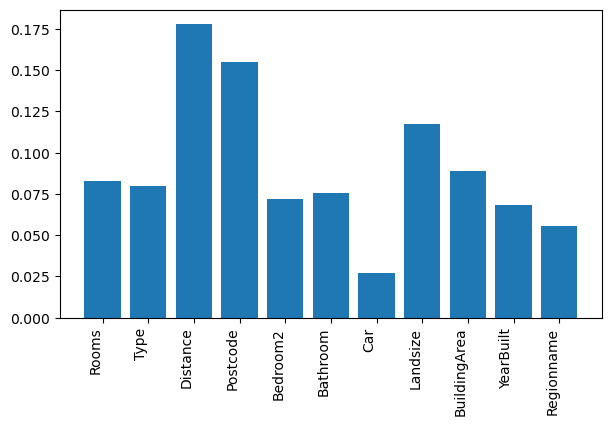

In [49]:
#Feature Importance of Random Forest

importance = rf.feature_importances_
#importance = importance[0:-1]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: '+format(x.columns[i])+' Score: '+format(round(v,3)))
    
# plot feature importance
#columns = x.columns.tolist()[:-2]

pyplot.rcParams["figure.figsize"] = (7,4)
pyplot.bar(x.columns, importance)
plt.xticks(range(11), x.columns, rotation=90, ha='right')

pyplot.show()

In [50]:
from sklearn.metrics import r2_score
r2_rf = r2_score(y_test,y_pred)
r2_rf

0.8011212011524428

### Conclusion

After implementing all of these feature selection techniques, mutual information is giving the best outcomes. The reason I chose mutual information over any other techniques is because the feature score of mutual information is matching with the correlation values. From the correlation, we can notice that the number of bedrooms, bathrooms and carslots are significantly affecting the house price, and mutual information is giving the same results that can be seen from the graph.

The worst technique for feature selection is chi-square because it is not giving adequate information to select the best features that can clearly be noticed from its graph. 